<a href="https://colab.research.google.com/github/Borys35/1D-2D-Interpolation/blob/main/soic_1d_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

# Functions
def f1(x):
  return np.sin(x)
def f2(x):
  return np.sin(x**-1)
def f3(x):
  return np.sign(np.sin(x*8))

# Kernels
def h1(x):
  return np.where((x >= 0) & (x < 1), 1, 0)
def h2(x):
  return np.where((x >= -1/2) & (x < 1/2), 1, 0)
def h3(x):
  return np.where((x >= -1) & (x <= 1), 1 - np.abs(x), 0)

In [111]:
def interpolate(x, f, scale=1):

    y = f(x)
    N = len(x)
    x_interp = np.linspace(x.min(), x.max(), N * scale)
    y_interp = interp1d(x, y, kind='zero')(x_interp)

    mse = mean_squared_error(y_interp, f(x_interp))
    print(f'MSE: {mse}')

    return x_interp, y_interp

In [112]:
def plot(f):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

  N = 40
  x = np.linspace(-np.pi, np.pi, N)

  x_interp, y_interp = interpolate(x, f, 2)
  ax1.plot(x, f(x), '.', label='Funkcja')
  ax1.plot(x_interp, y_interp, label='Interpolacja')
  ax1.legend()
  ax1.set_title(f"Funkcja {f.__name__}, {N*2} punktów")

  x_interp, y_interp = interpolate(x, f, 4)
  ax2.plot(x, f(x), '.', label='Funkcja')
  ax2.plot(x_interp, y_interp, label='Interpolacja')
  ax2.legend()
  ax2.set_title(f"Funkcja {f.__name__}, {N*4} punktów")


  x_interp, y_interp = interpolate(x, f, 10)
  ax3.plot(x, f(x), '.', label='Funkcja')
  ax3.plot(x_interp, y_interp, label='Interpolacja')
  ax3.legend()
  ax3.set_title(f"Funkcja {f.__name__}, {N*10} punktów")

  plt.show()

In [113]:
def kernel_func(h, x, offset, width):
  x = x - offset
  x = x / width
  return h(x)

In [114]:
def convolve_interpolate(x_measure, y_measure, x_interpolate, kernel):
    width = x_measure[1] - x_measure[0]
    kernels = np.asarray([kernel_func(kernel, x_interpolate, offset, width) for offset in x_measure])

    # return matrix multiplication
    return y_measure @ kernels

In [115]:
def interpolate_with_convolution(x, f, h, scale=1):
    y = f(x)
    N = len(x)

    x_interp = np.linspace(x.min(), x.max(), N * scale)
    y_interp = convolve_interpolate(x, y, x_interp, h)
    y_true = f(x_interp)

    mse = mean_squared_error(y_true, y_interp)
    print(f'MSE: {mse:.5f}')

    return x_interp, y_interp

In [116]:
def plot_with_convolution(f, h = h1):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

  N = 40
  x = np.linspace(-np.pi, np.pi, N)

  x_interp, y_interp = interpolate_with_convolution(x, f, h, 2)
  ax1.plot(x, f(x), '.', label='Funkcja')
  ax1.plot(x_interp, y_interp, label='Interpolacja')
  ax1.legend()
  ax1.set_title(f"Funkcja {f.__name__}, kernel {h.__name__}, {N*2} punktów")

  x_interp, y_interp = interpolate_with_convolution(x, f, h, 4)
  ax2.plot(x, f(x), '.', label='Funkcja')
  ax2.plot(x_interp, y_interp, label='Interpolacja')
  ax2.legend()
  ax2.set_title(f"Funkcja {f.__name__}, kernel {h.__name__}, {N*4} punktów")

  x_interp, y_interp = interpolate_with_convolution(x, f, h, 10)
  ax3.plot(x, f(x), '.', label='Funkcja')
  ax3.plot(x_interp, y_interp, label='Interpolacja')
  ax3.legend()
  ax3.set_title(f"Funkcja {f.__name__}, kernel {h.__name__}, {N*10} punktów")

  plt.show()

MSE: 0.00423
MSE: 0.00417
MSE: 0.00645


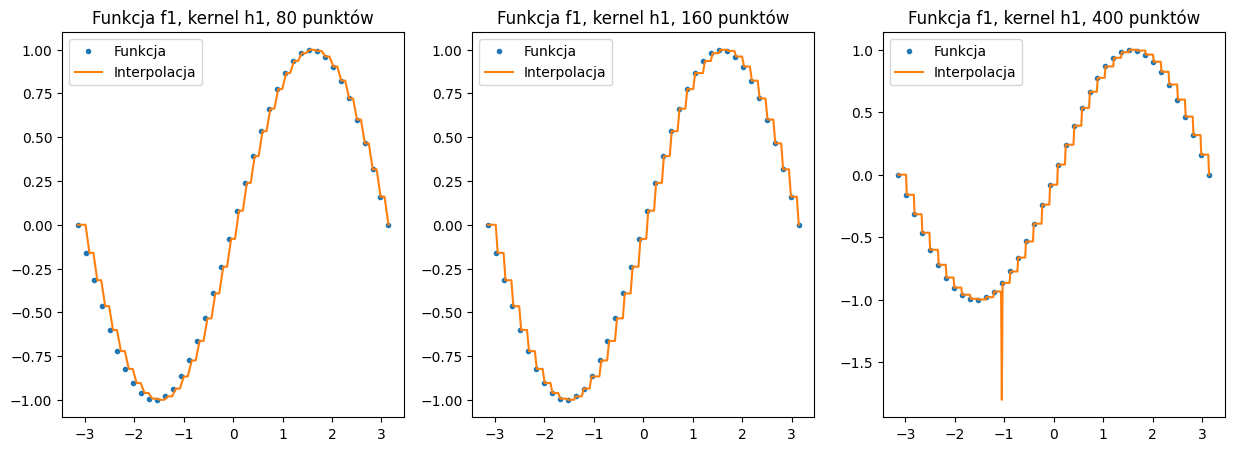

MSE: 0.00113
MSE: 0.00107
MSE: 0.00108


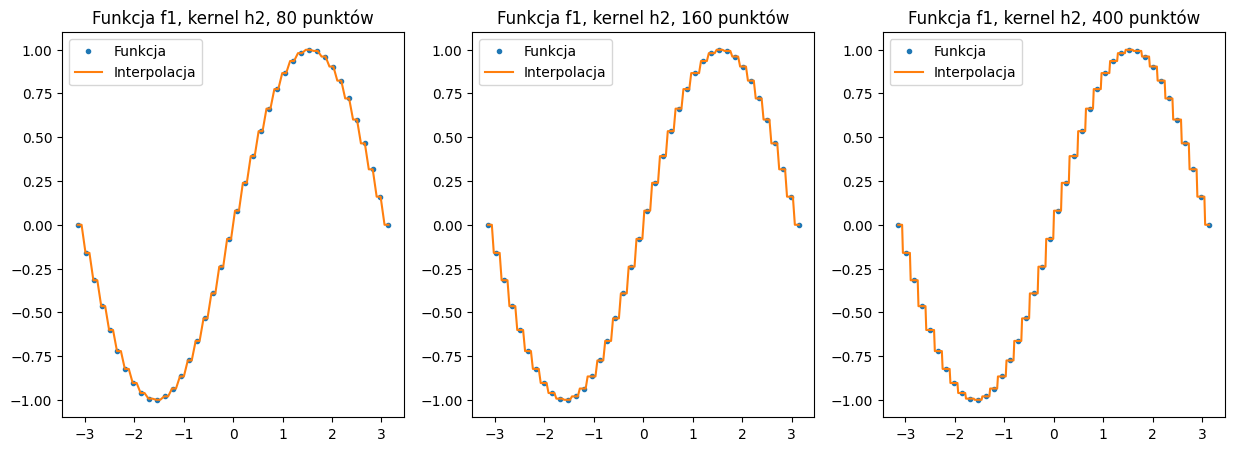

MSE: 0.00000
MSE: 0.00000
MSE: 0.00000


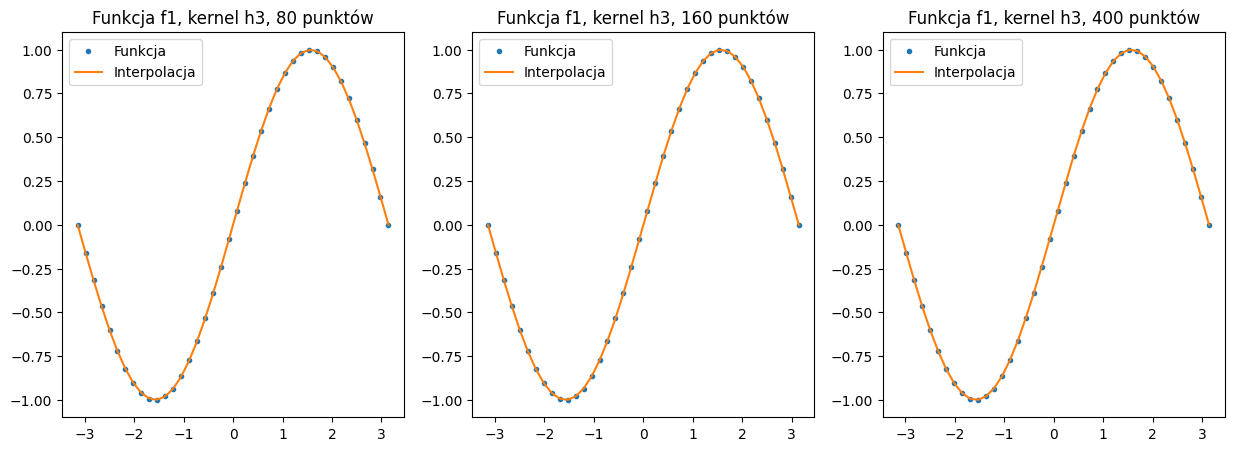

MSE: 0.09479
MSE: 0.08199
MSE: 0.09646


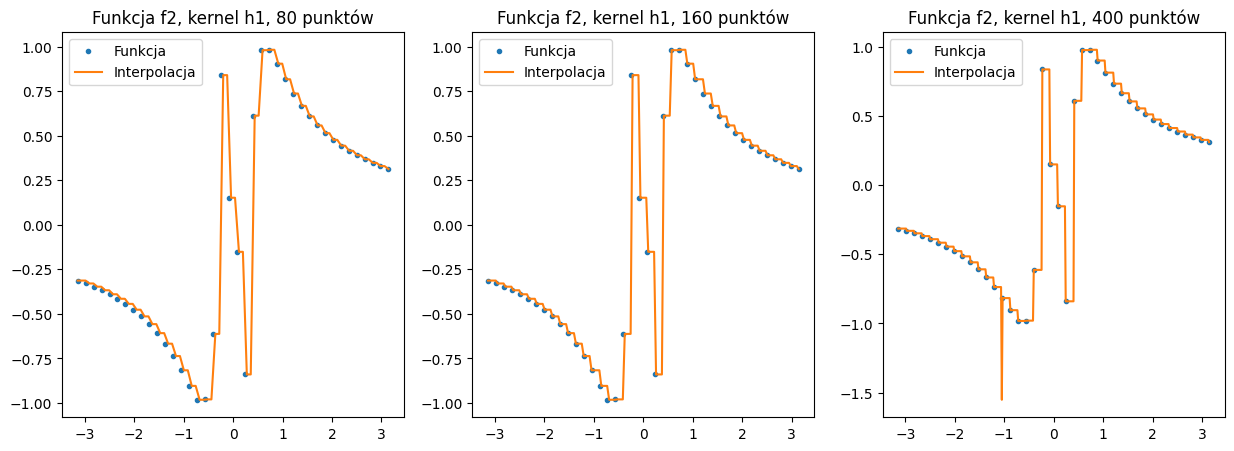

MSE: 0.03340
MSE: 0.03444
MSE: 0.04472


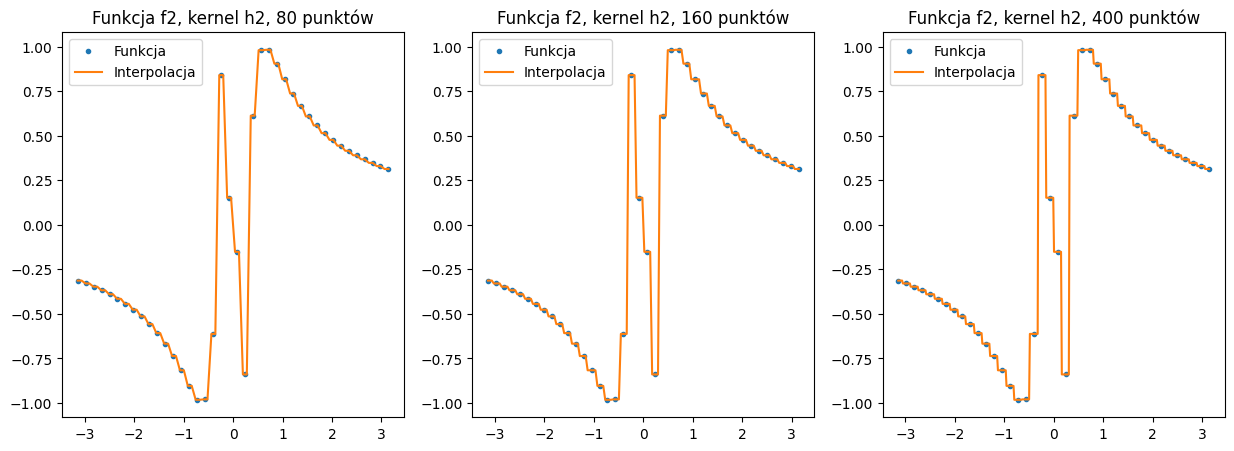

MSE: 0.03799
MSE: 0.03196
MSE: 0.04083


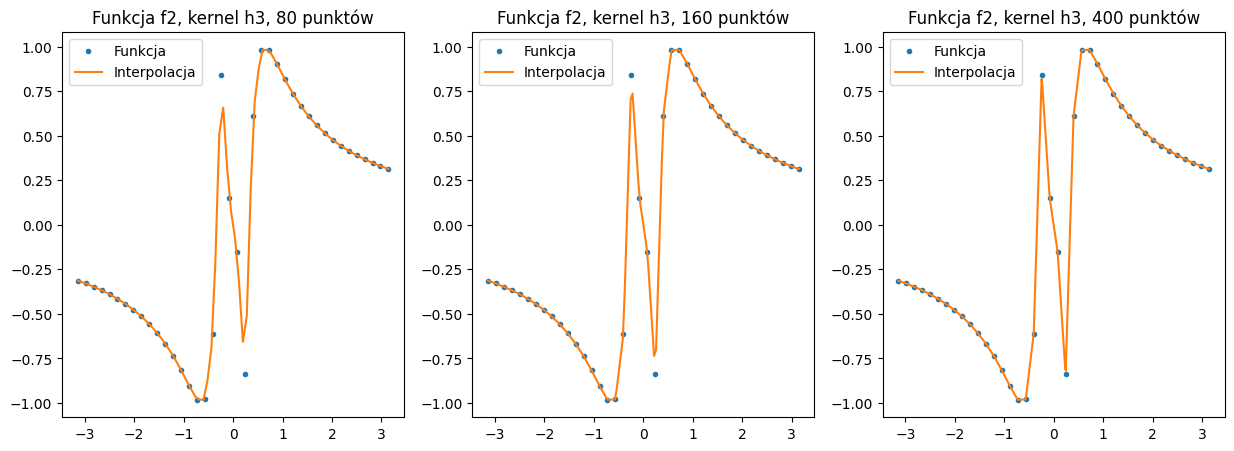

MSE: 0.75000
MSE: 0.75000
MSE: 0.77250


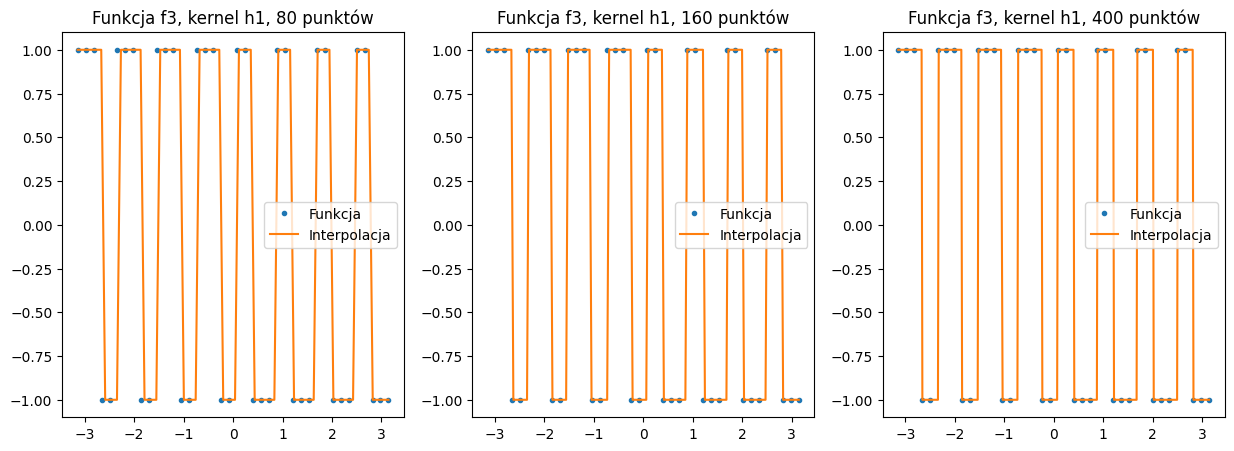

MSE: 0.40000
MSE: 0.35000
MSE: 0.34000


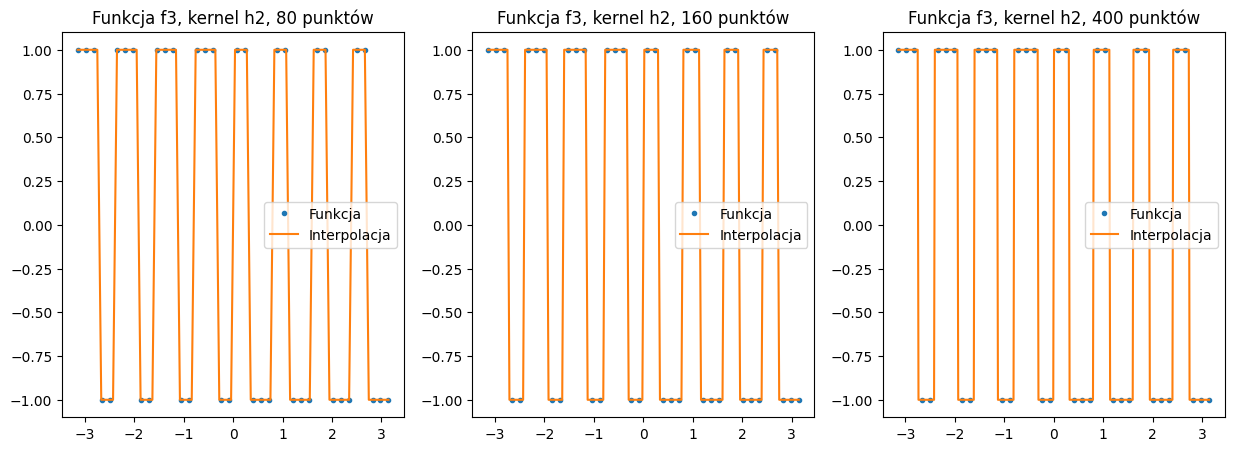

MSE: 0.22419
MSE: 0.23325
MSE: 0.23775


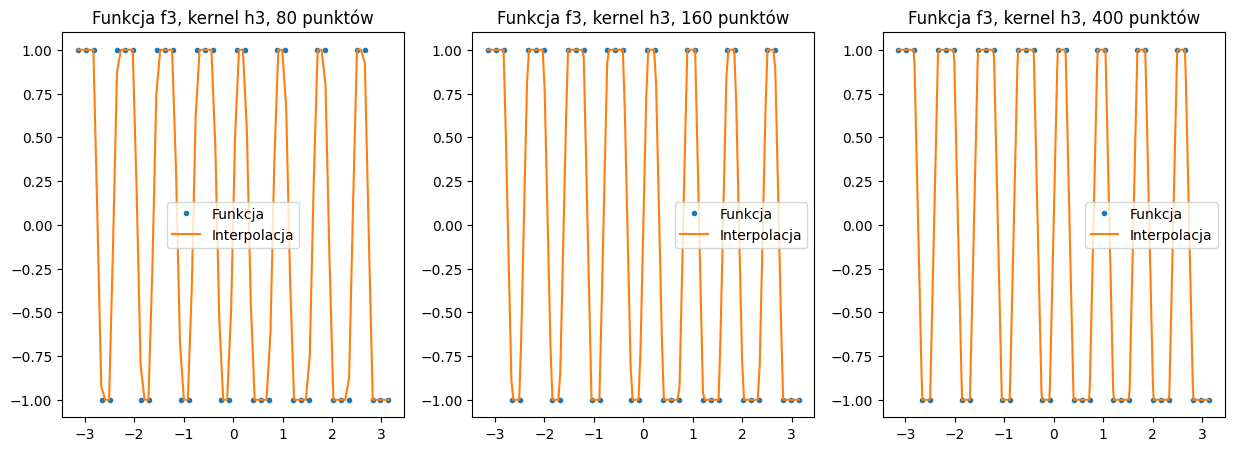

In [117]:
for f in [f1, f2, f3]:
    for h in [h1, h2, h3]:
      plot_with_convolution(f, h)

MSE: 0.004225697623894216
MSE: 0.004172673350893256
MSE: 0.004261076364139978


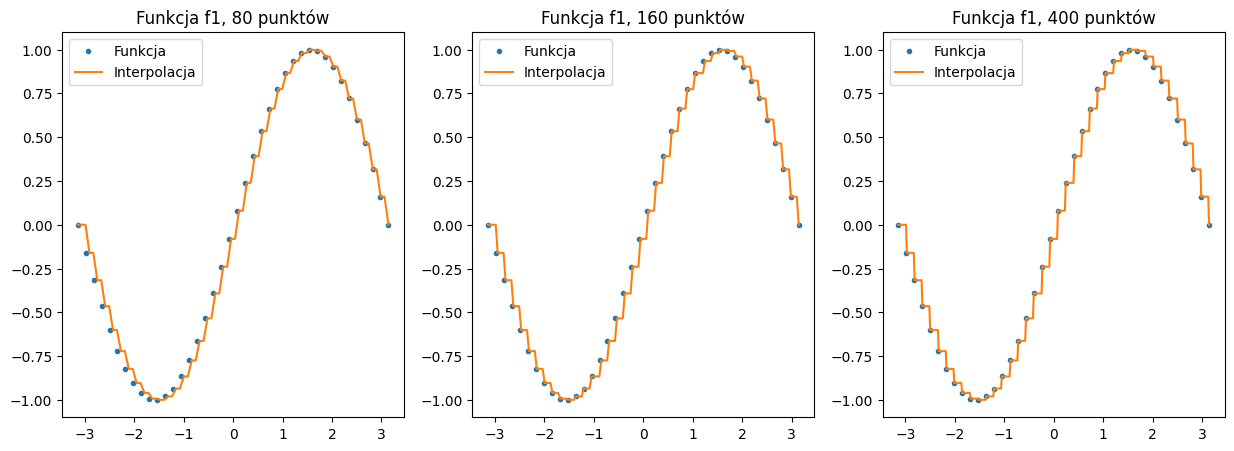

MSE: 0.09479016046881164
MSE: 0.08198530255807006
MSE: 0.09510701661192542


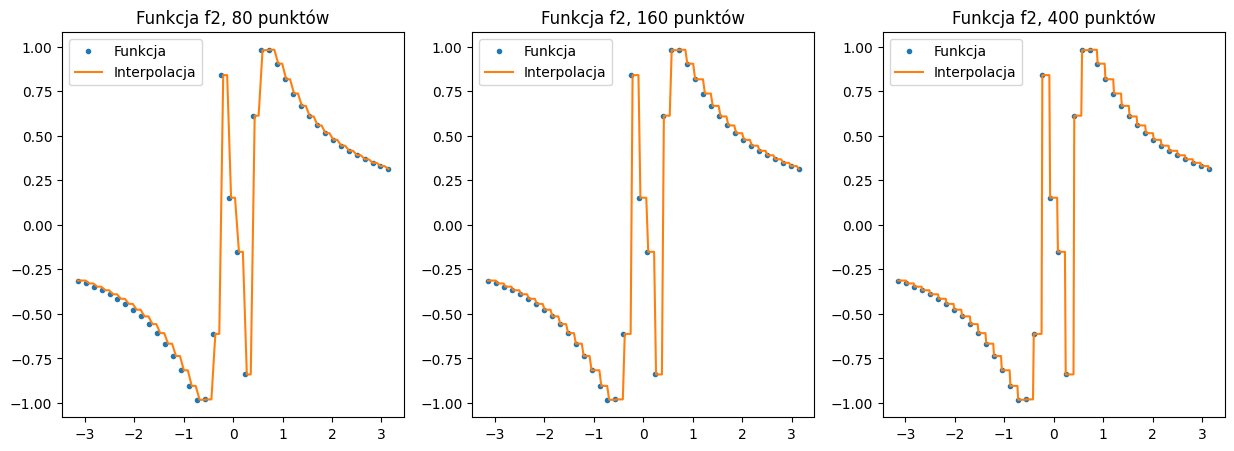

MSE: 0.75
MSE: 0.75
MSE: 0.77


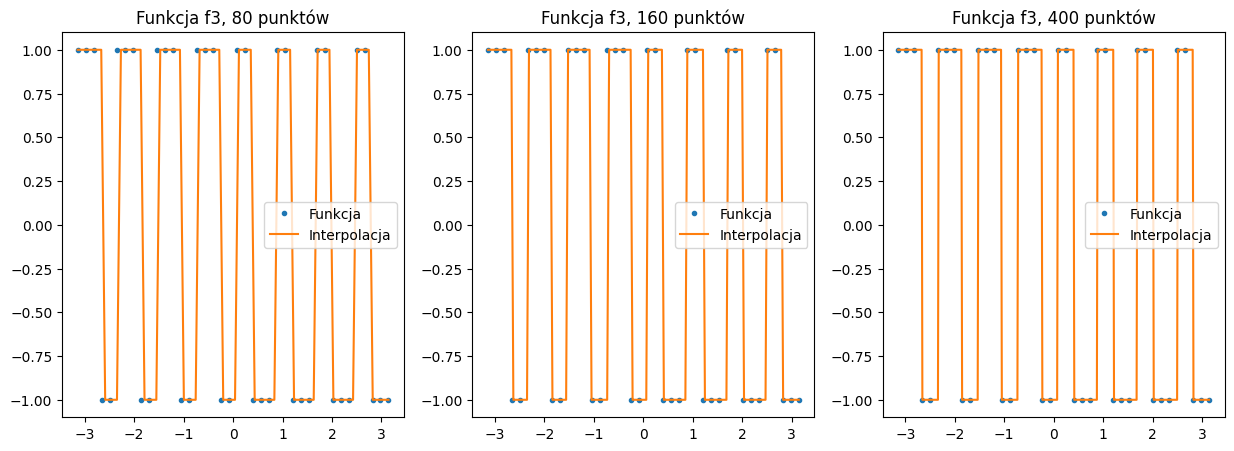

In [118]:
for f in [f1, f2, f3]:
   plot(f)